Load the `tidyverse` and `palmerpenguins` packages.

In [1]:
# load package here
library("tidyverse")
library("palmerpenguins")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
penguins |> glimpse()

Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


Make a data frame called "adelie" of penguins data with just "Adelie" penguins no missing data.

❗️*Hint: pipe your data in to the `drop_na` function to remove missing values*

In [4]:
adelie <- penguins |> filter(species == "Adelie") |> drop_na()
adelie |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007
Adelie,Torgersen,38.9,17.8,181,3625,female,2007


Plot `bill_depth_mm` (y-axis) as a function of `bill_length_mm` (x-axis) for your "adelie" dataset.

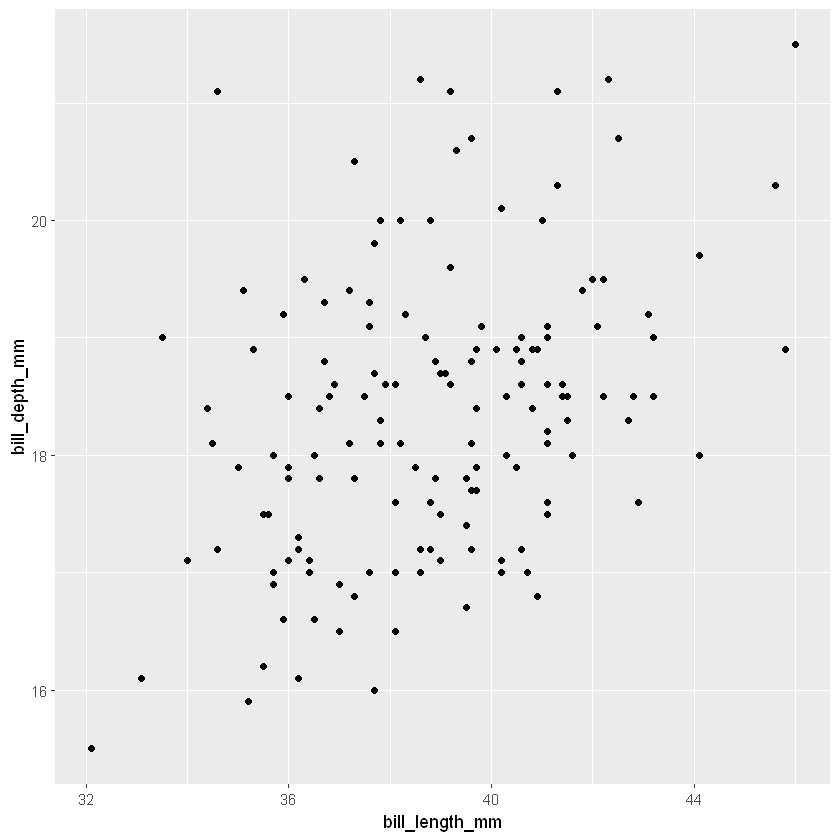

In [5]:
ggplot(adelie, aes(x = bill_length_mm,y = bill_depth_mm)) + geom_point()

Run the code below to generate 1000 random models.

In [8]:
n <- 1000

models <- tibble(
  intercept = runif(n, 0, 40),
  slope = runif(n, -5, 5)
)

models |> glimpse()

Rows: 1,000
Columns: 2
$ intercept <dbl> 30.171579, 18.291479, 1.973605, 36.059353, 3.774055, 27.9841…
$ slope     <dbl> 2.0013807, -2.5390167, -2.7288241, 4.4088664, 4.6106310, -2.…


Re-create your scatter chart from above but this time overlay what the models look like by adding this layer:

```r
geom_abline(aes(slope = slope, intercept = intercept), data = models, alpha = 0.5, color = 'coral')
```

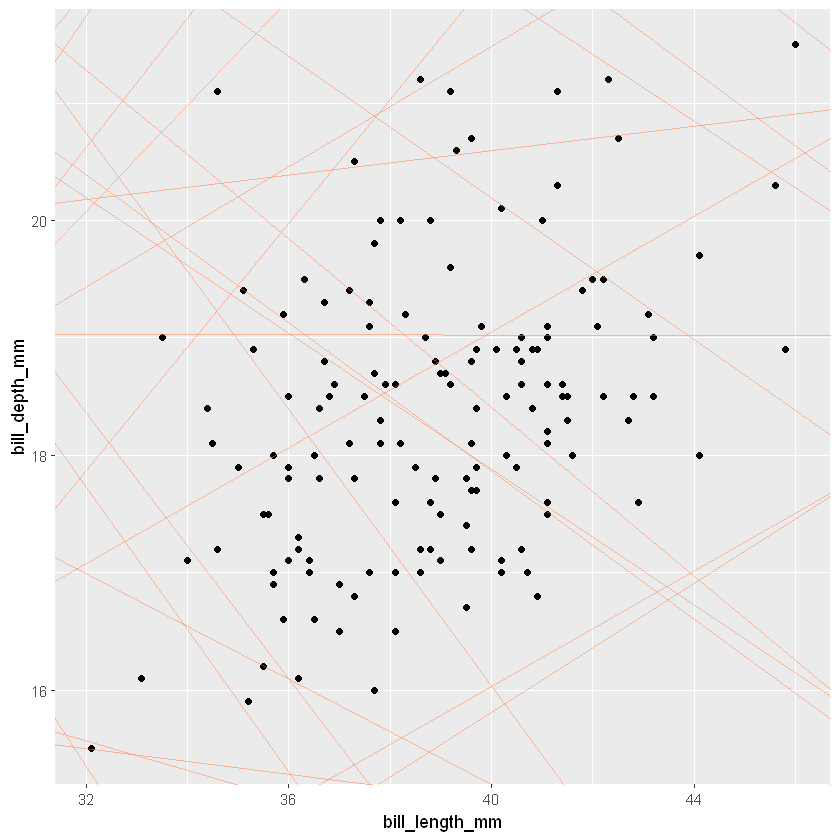

In [10]:
ggplot(adelie, aes(x = bill_length_mm,y = bill_depth_mm)) + geom_point() +
  geom_abline(aes(slope = slope, intercept = intercept),
              data = models, alpha = 0.5, color = "coral")

What's the best model? Below we create a data frame of models over a range of values for the "slope" and "intercept." We also calculate a metric that we can use to rank models. In this case, let's use [sum of squared error](https://en.wikipedia.org/wiki/Residual_sum_of_squares) (SSE).

In [16]:
model_estimate = function(slope, intercept, data) {
    slope * data$bill_depth_mm + intercept
}

sum_of_squared_eror = function(slope, intercept, data) {
  diff = data$bill_length_mm - model_estimate(slope, intercept, data)
  sum(diff ^ 2)
}

models2 = expand.grid(
  intercept = seq(10, 50, length = 80),
  slope = seq(-2.5, 2.5, length = 80)
) %>% mutate(sse = purrr::pmap_vec(., sum_of_squared_eror, data = adelie))

models2 |> glimpse()

Rows: 6,400
Columns: 3
$ intercept <dbl> 10.00000, 10.50633, 11.01266, 11.51899, 12.02532, 12.53165, …
$ slope     <dbl> -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, -2.5, …
$ sse       <dbl> 817804.8, 806799.2, 795868.4, 785012.4, 774231.4, 763525.1, …


Let's plot SSE for all the models we tested and highlight the five best scoring models.

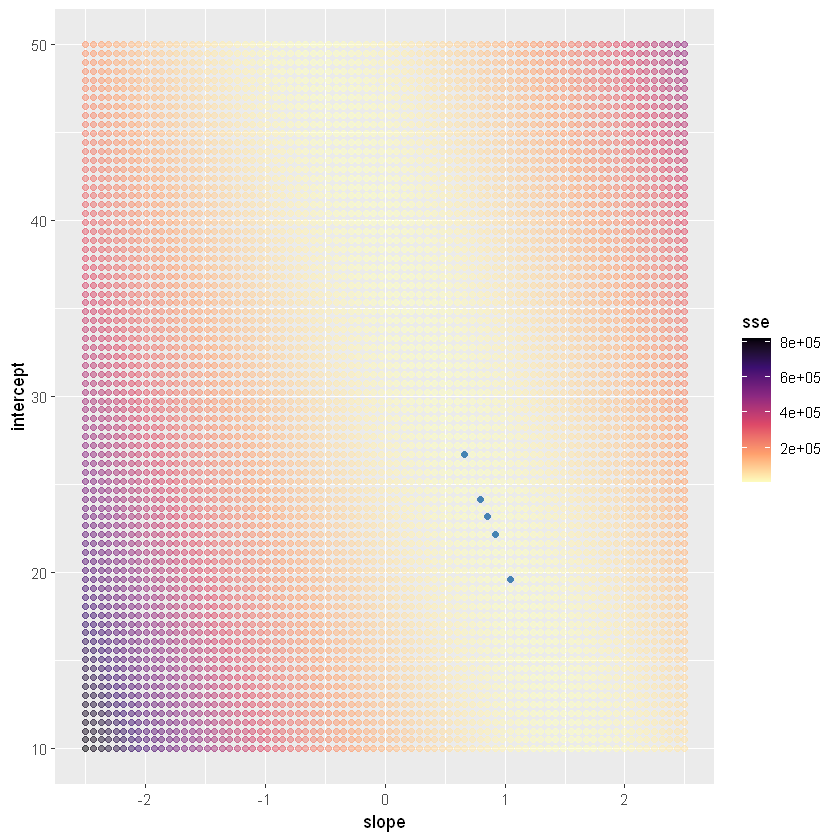

In [17]:
p = ggplot(models2, aes(slope, intercept, color = sse)) + 
    geom_point(alpha = 0.5) + 
    geom_point(data = models2 |> slice_min(sse, n = 5), color = 'steelblue') +
    scale_color_viridis_c(option = 'magma', direction = -1)
p

And these are our five best models:

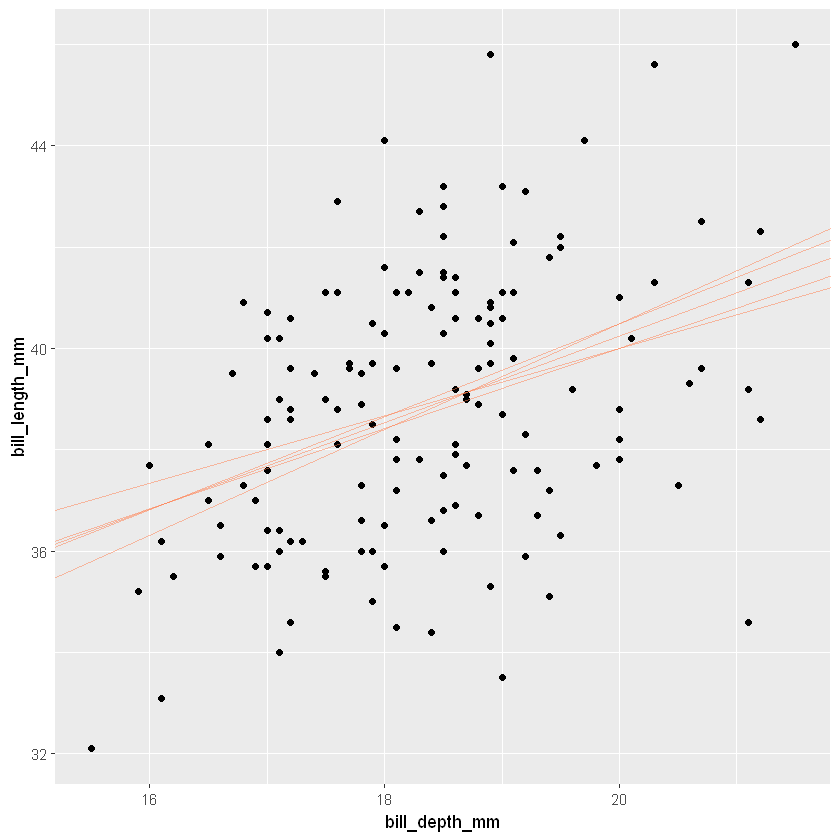

In [22]:
p <- ggplot(adelie, aes(x = bill_depth_mm, y = bill_length_mm)) +
  geom_point(na.rm = TRUE) +
  geom_abline(aes(slope = slope, intercept = intercept),
              data = models2 |> slice_min(sse, n = 5),
              alpha = 0.5, color = "coral")

p

Can you build a model with `Tidymodels` to compare with the output above?

In [23]:
library('tidymodels')

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.2.1
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.1.0
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



In [24]:
# fill in the formula below
mod <- linear_reg() |> set_engine("lm")
mod_fit <- mod |> fit(bill_depth_mm ~ bill_length_mm, data = adelie)

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),11.4877071,1.3700993,8.38458,4.231276e-14
bill_length_mm,0.1766834,0.0352079,5.01829,1.514901e-06
